# 2.1

(2000, 1500, 3)


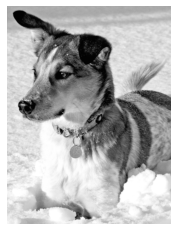

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import color

A = imread(os.path.join('DATA', 'dog.jpg'))
print(A.shape)
imgGray = color.rgb2gray(A)
img = plt.imshow(imgGray)


img.set_cmap('gray')
plt.axis('off')
plt.show()


In [9]:
# compute DFT of image
Bt = np.fft.fft2(imgGray)
# sort by magnitude
Btsort = np.sort(np.abs(Bt.reshape(-1)))


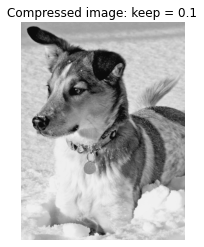

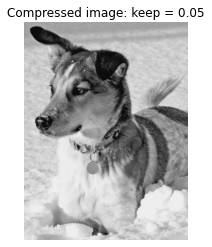

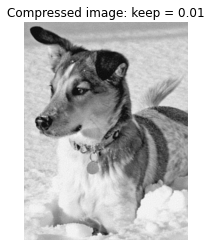

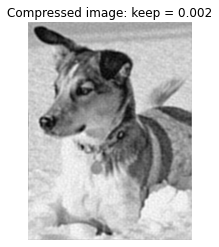

In [10]:
error_list = []
keep_list = [0.1, 0.05, 0.01, 0.002]
for keep in keep_list:
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    rel_err = np.linalg.norm(imgGray - Alow, 'fro')/np.linalg.norm(imgGray, 'fro')
    rel_err = (rel_err)**2
    error_list.append(rel_err)
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

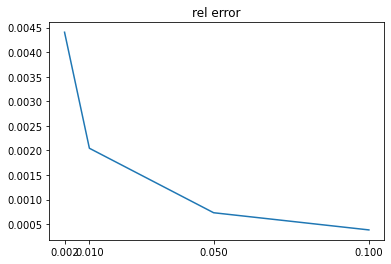

In [14]:
plt.figure()
plt.plot(keep_list, error_list)
plt.xticks(keep_list)
plt.title('rel error')
plt.show()